# Whitening Transformation

<justify>
The goal of the retina in the eye is to remove redundancy in the visual cortex. This is achieved by transforming the visual information into a statistically independent basis by a process called whitening. This essentially removes correlation and reduces the dimensionality.
</justify>

In [1]:
import numpy as np
import numpy.matlib
from numpy import linalg as LA
from IPython.display import display, Math, Latex
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Mu       = [3,4]
Sigma    = [[20, 11],[11, 20]]
Nsamples = 5000
Xdata    = np.random.multivariate_normal(Mu, Sigma, Nsamples).T

<justify>
<p>Let $X = [ X_1, \dots, X_i, \dots, X_C ] \in \mathbb{R}^{D, N}$, denote the data samples of dimension $D$, where $N$ is the total number of samples. The data is centered by subtracting the mean as, $\bar{X}=X-\frac{1}{N}\sum_{i=1}^{N}X_{i}$.<p>

<p>The whitening transformation matrix is obtained by performing the eigenvalue decomposition on the covariance matrix, 
\begin{align}
\mathbb E[\bar{X}\bar{X}^T]=\Gamma \Lambda \Gamma ^T 
\end{align}	 where $\Gamma$ is the matrix containing the eigenvectors of $\mathbb E[\bar{X}\bar{X}^T]$ and $\Lambda$ is the diagonal matrix of eigenvalues.<p>

The whitening transformation is given by, 
\begin{align}
W=\Lambda^{-0.5} \Gamma \widetilde{X} 
\end{align}
</justify>

In [3]:
def WhitenData(X):
    [n,m]         = np.shape(X)
    Xdata_meansub = X - np.matlib.repmat(np.mean(X,1),m,1).T
    CovX          = np.dot(Xdata_meansub,Xdata_meansub.T)
    [E,D]         = LA.eig(CovX/m)
    Xwhiten       = np.dot(np.dot(np.diag(E**-0.5),D),Xdata_meansub)
    
    return Xwhiten

In [4]:
# Whiten the data matrix
Xwhiten = WhitenData(Xdata)

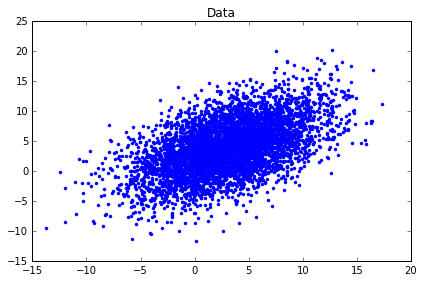

In [5]:
plt.plot(Xdata[0,:], Xdata[1,:], 'b.')
plt.title('Data')
plt.tight_layout()
plt.show()


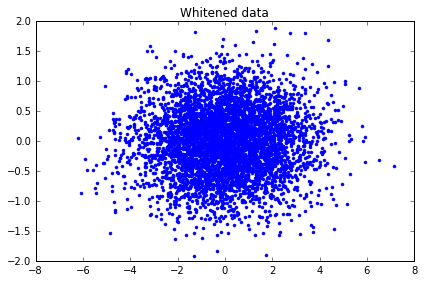

In [6]:
plt.plot(Xwhiten[0,:], Xwhiten[1,:], 'b.')
plt.title('Whitened data')
plt.tight_layout()
plt.show()